In [1]:
install.packages("tidyverse")
install.packages("data.table")
install.packages("TraMineR")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(tidyverse)
library(data.table)
library(TraMineR)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



TraMineR stable version 2.2-1 (Built: 2021-02-25)

Website: http://traminer.unige.ch

Please type 'citation("TraMineR")' for citation information.




In [20]:
pos_data_seq <- readRDS("pos_data_seq.rda")
profils <- readRDS("lkdn_F_final_indiv.rda")  %>% 
semi_join(pos_data_seq, by = c("X_id"))

In [ ]:
#création des états
#pour avoir la liste (non-ordonnée) 
pos_data_seq %>% distinct(pos.rec2, .keep_all = FALSE)

In [7]:
pos.states <- c("INTERN", "AMATEUR", "JRI", "SR", "FREELANCE", "RED", "REPORTER", "JOURNALIST", "PROF_ELITE", "ORG_ELITE", "IND_ELITE", "AUDIOVISUAL", "AUTHOR",  "WEB_DESIGN", "EDUCATION", "COM_CONS",  "OTHER")
  
#il faut ajouter la couleur des valeurs manquantes en dernier dans la palette, manifestement l'arg 'missing.col' dans le seqdef ne suffit pas.
pos.col <- c("aliceblue", "cadetblue", "cadetblue3", "cyan1", "cyan4", "cornflowerblue", "deepskyblue", "darkblue", "gold", "gold3", "goldenrod3", "bisque", "darkseagreen", "firebrick", "forestgreen", "darksalmon", "floralwhite", "grey")

#avec la distinction selon le type de présomption des act freelance
pos.states.2 <- c("INTERN", "AMATEUR", "JRI", "SR", "FREELANCE", "MULTIEMPLOI", "OVERLAP", "RED", "REPORTER", "JOURNALIST", "PROF_ELITE", "ORG_ELITE", "IND_ELITE", "AUDIOVISUAL", "AUTHOR",  "WEB_DESIGN", "EDUCATION", "COM_CONS",  "OTHER")

#il faut ajouter la couleur des valeurs manquantes dans la palette, manifestement l'arg 'missing.col' dans le seqdef ne suffit pas.
pos.col.2 <- c("aliceblue", "cadetblue", "cadetblue3", "cadetblue4", "cyan2", "cyan3", "cyan4", "cornflowerblue", "deepskyblue", "deepskyblue4", "gold", "gold3", "goldenrod3", "bisque", "darkseagreen", "firebrick", "forestgreen", "darksalmon", "floralwhite", "grey")

#pour les sÃ©quences en calendaires, il faut distinguer les NA pendant la carriÃ¨re de celles qui prÃ©cÃ¨dent la premiÃ¨re activitÃ©
pos.states.3 <- c("INTERN", "AMATEUR", "JRI", "SR", "FREELANCE", "RED", "REPORTER", "JOURNALIST", "PROF_ELITE", "ORG_ELITE", "IND_ELITE", "AUDIOVISUAL", "AUTHOR",  "WEB_DESIGN", "EDUCATION", "COM_CONS",  "OTHER", "NonAct")

#Calendaire, avec la distinction selon le type de prÃ©somption des act freelance
pos.states.4 <- c("INTERN", "AMATEUR", "JRI", "SR", "FREELANCE", "MULTIEMPLOI", "OVERLAP", "RED", "REPORTER", "JOURNALIST", "PROF_ELITE", "ORG_ELITE", "IND_ELITE", "AUDIOVISUAL", "AUTHOR",  "WEB_DESIGN", "EDUCATION", "COM_CONS",  "OTHER", "NonAct")

In [9]:
pos_data_seq <- pos_data_seq %>% as.data.frame()

In [10]:
pos_seq <-
  seqdef(
    pos_data_seq,
    var = c("X_id", "beginM", "endM", "pos.rec2"),
    informat = "SPELL",
    left = "DEL",
    right = "DEL",
    gaps = "NA",
    states = pos.states,
    alphabet = pos.states,
    missing = "NA",
    start = 960,
    xtstep = 12,
    process = FALSE,
    cnames = c(1:120),
    missing.color = "grey",
    cpal = pos.col
  )


 [>] time axis: 960 -> 1422

 [>] converting SPELL data into 7549 STS sequences (internal format)

 [>] found missing values ('NA') in sequence data

 [>] preparing 7549 sequences

 [>] coding void elements with '%' and missing values with '*'

 [!!] Empty sequence(s) with index: 255,353,598,685,1219,1234,1309,1370,1971,2137,2416,2442,2525,2553,2814,2876,3069,3191,3251,3340,3495,3497,3545,3611,3628,3779,3799,3804,3891,3911,4193,4640,4648,4764,4837,4899,4939,4958,5077,5100,5227,5389,5396,5571,5594,5595,5613,5615,5726,5946,6044,6122,6135,6198,6221,6224,6265,6274,6349,6500,6554,6597,6802,6812,6822,6888,6965,7329,7504,7505
      may produce inconsistent results.

 [>] adding special state(s) to the alphabet: NA

 [>] state coding:

       [alphabet]  [label]     [long label] 

     1  INTERN      INTERN      INTERN

     2  AMATEUR     AMATEUR     AMATEUR

     3  JRI         JRI         JRI

     4  SR          SR          SR

     5  FREELANCE   FREELANCE   FREELANCE

     6  RED        

# Description des séquences

## 10 premières années
On regarde l'évolution des dix premières années de carrière toutes cohortes confondues. On voit clairement un creux dans les premières années de carrière, marquées par une forte proportion de période sans activité

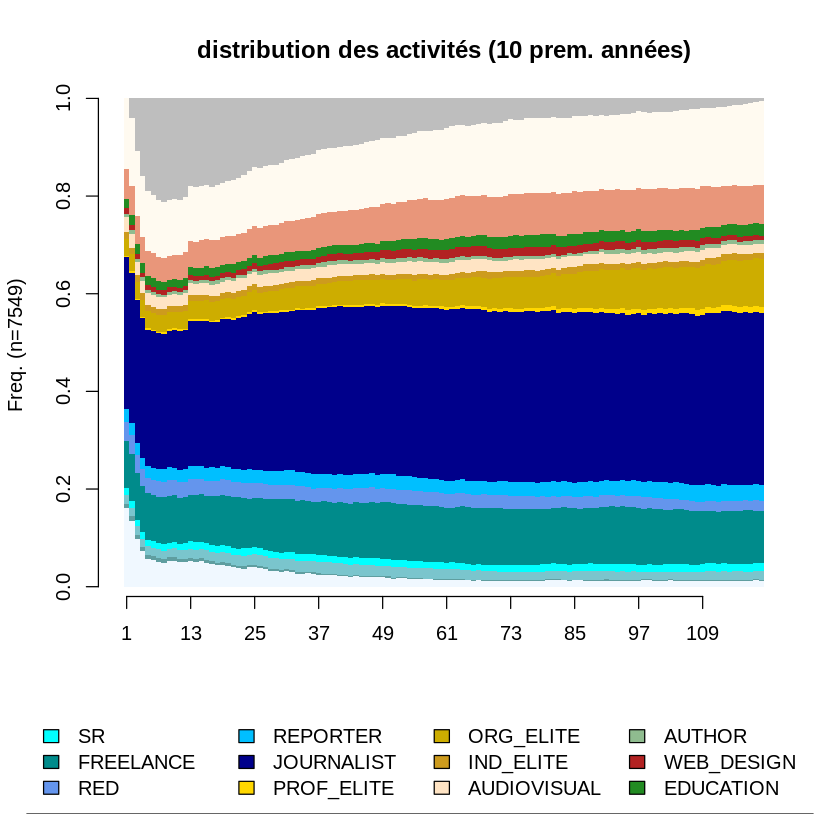

In [15]:
seqdplot(pos_seq[,1:120], main = "distribution des activités (10 prem. années)", border = NA, cex.legend = 0.8)

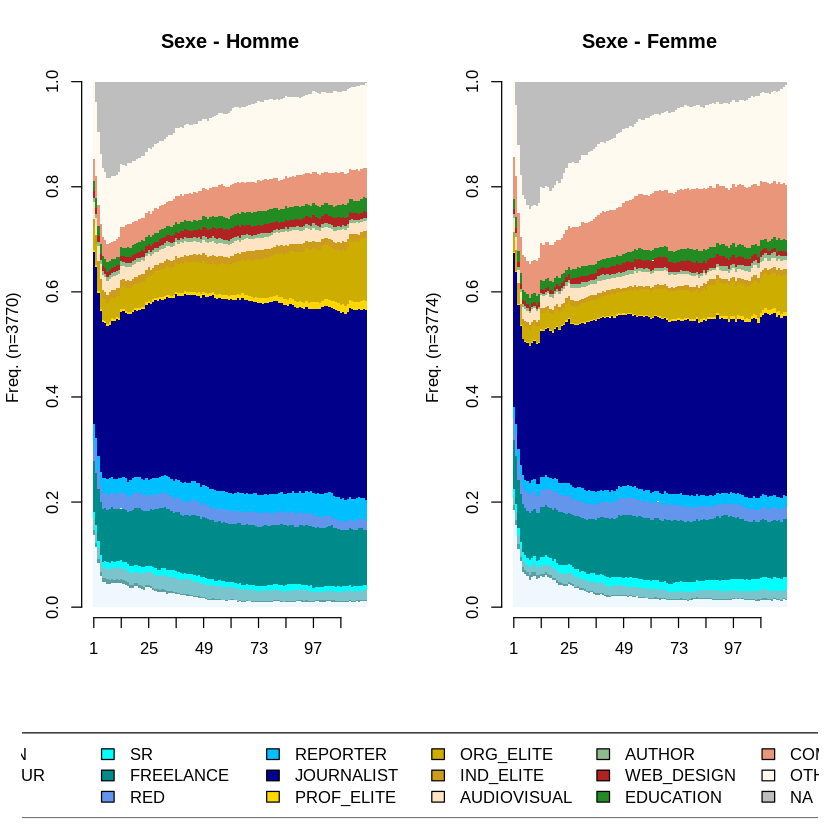

In [26]:
seqdplot(pos_seq[,1:120], group = profils$gender, border = NA, main = "Sexe")

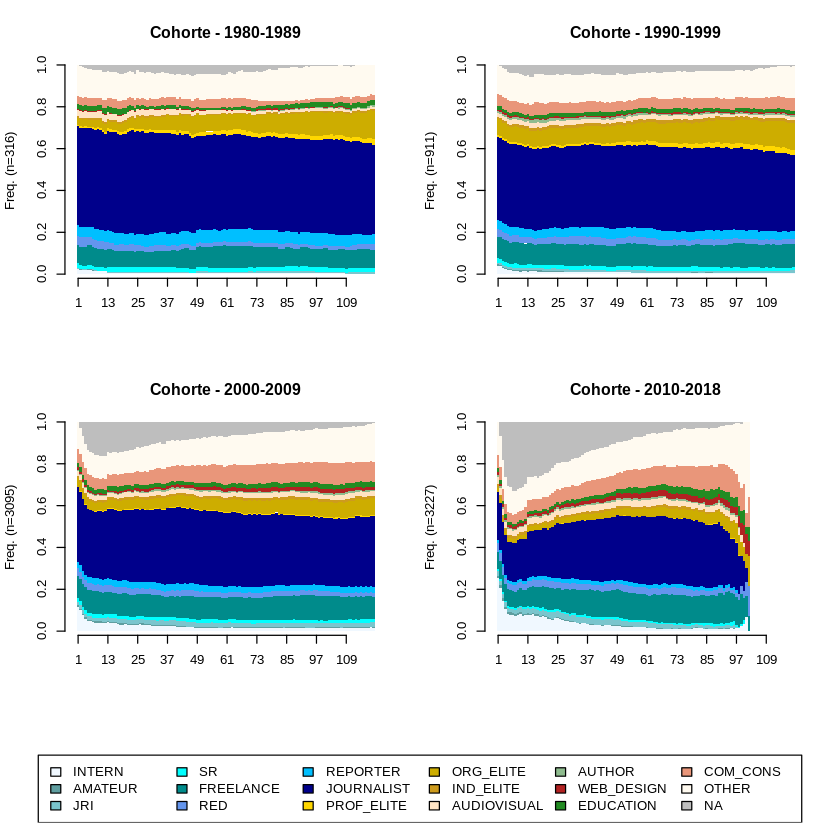

In [24]:
seqdplot(pos_seq[,1:120], group = profils$first.exp.y.10, border = NA, main = "Cohorte")

ERROR: Error in parse(text = x, srcfile = src): <text>:1:9: unexpected symbol
1: jupyter nbconvert
            ^
